<a href="https://colab.research.google.com/github/yablockoo/GB/blob/AI/HW2AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Опишите - какой результата получен в нейросети в зависимости от:

числа нейронов в слое(для 2-хслойной сети),


числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).


фиксируйте для тренировочного и тестового набора метрики accuracy.



In [ ]:
!pip install keras
!pip install mnist
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 5.5 MB/s 


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


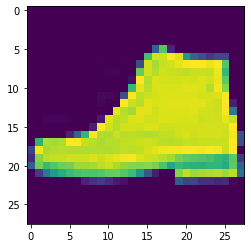

In [ ]:
plt.imshow(train_imagef[42,:,:])
plt.show()

In [ ]:
# Normalize the images.
train_imagesi = (train_imagef / 127) - 1
test_imagesi = (test_imagef / 127) - 1

# Flatten the images.
train_images = train_imagef.reshape((-1, 784))
test_images = test_imagef.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [ ]:
y_t = to_categorical(train_labelf)
y_tt = to_categorical(test_labelf)

Изменяем количество нейронов в слое

In [ ]:
def neurons_in_models(neurons):
  model = Sequential([
                        Dense( 64, activation='relu', input_shape=(784,)),
                        Dense(neurons, activation='tanh'),
                        Dense(10, activation='softmax'),
                        ])

  model.compile(
    optimizer='adam', # оптимизатор
    loss=keras.losses.CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
  ) 


  # Train the model.
  hh = model.fit(    
    train_images[:,:],

    y_t[:,:],
    epochs=15,
    batch_size=32, validation_split=0.2, verbose = 0
  )

  # Evaluate the model.
  model.evaluate( 
    test_images,
    y_tt
  )

  predictions = model.predict(test_images)

  plt.plot(hh.history['accuracy'])
  plt.plot(hh.history['val_accuracy'])
  plt.title(f'model accuracy {neurons}neurons')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  

313/313 [==============================] - 1s 2ms/step - loss: 1.3864 - accuracy: 0.3742


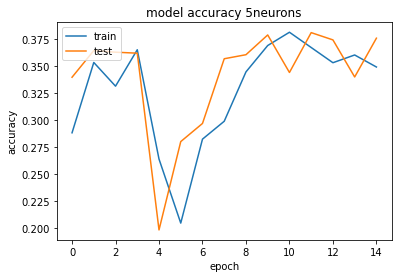

313/313 [==============================] - 1s 3ms/step - loss: 1.0187 - accuracy: 0.6276


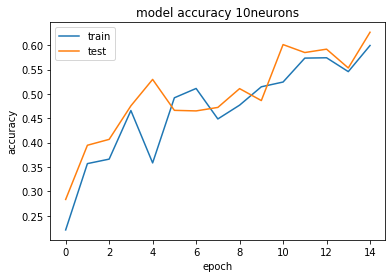

313/313 [==============================] - 1s 3ms/step - loss: 1.2513 - accuracy: 0.5085


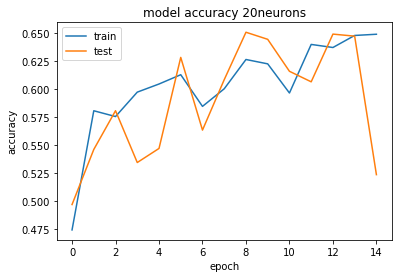

313/313 [==============================] - 1s 3ms/step - loss: 0.7852 - accuracy: 0.7079


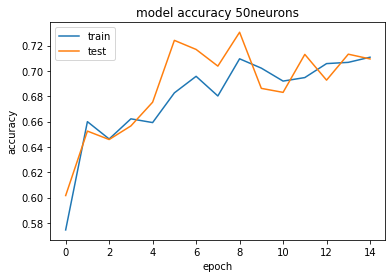

313/313 [==============================] - 1s 3ms/step - loss: 0.7850 - accuracy: 0.6950


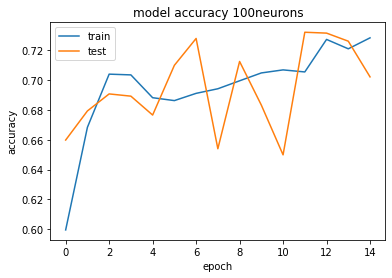

313/313 [==============================] - 1s 3ms/step - loss: 0.5898 - accuracy: 0.7913


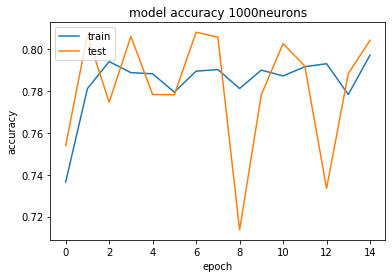

313/313 [==============================] - 2s 6ms/step - loss: 0.9063 - accuracy: 0.8132


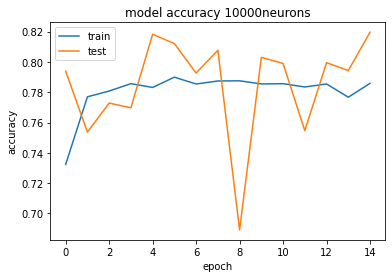

In [ ]:
neurons_in_models(5)
neurons_in_models(10)
neurons_in_models(20)
neurons_in_models(50)
neurons_in_models(100)
neurons_in_models(1000)
neurons_in_models(10000)

Изменяем количество слоев

In [ ]:
def layers_in_models(layers):
  model = Sequential([Dense( 64, activation='relu', input_shape=(784,))])

  for i in range(layers):
    model.add(tf.keras.layers.Dense(64, activation='tanh'))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(
    optimizer='adam', # оптимизатор
    loss=keras.losses.CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
  ) 


  # Train the model.
  hh = model.fit(    
    train_images[:,:],

    y_t[:,:],
    epochs=15,
    batch_size=32, validation_split=0.2, verbose = 0
  )

  # Evaluate the model.
  model.evaluate( 
    test_images,
    y_tt
  )


  predictions = model.predict(test_images)

  plt.plot(hh.history['accuracy'])
  plt.plot(hh.history['val_accuracy'])
  plt.title(f'model accuracy {layers}layers')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.7672 - accuracy: 0.7133


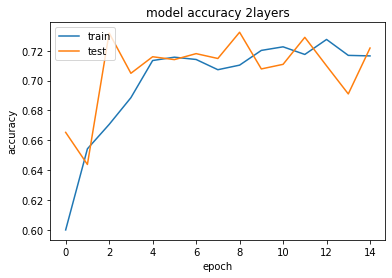

313/313 [==============================] - 1s 2ms/step - loss: 0.7167 - accuracy: 0.7382


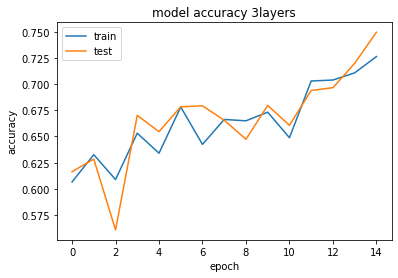

313/313 [==============================] - 1s 3ms/step - loss: 0.9450 - accuracy: 0.6316


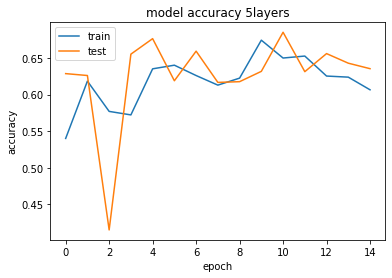

313/313 [==============================] - 1s 3ms/step - loss: 1.0215 - accuracy: 0.6135


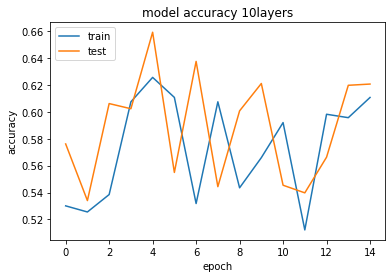

313/313 [==============================] - 2s 4ms/step - loss: 2.3096 - accuracy: 0.1000


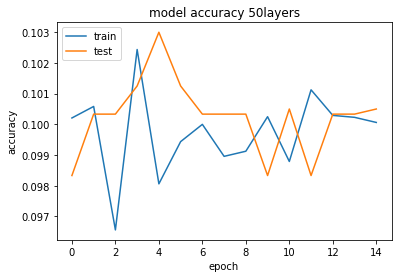

In [ ]:
layers_in_models(2)
layers_in_models(3)
layers_in_models(5)
layers_in_models(10)
layers_in_models(50)

Работа разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей.

In [ ]:
def optimization_in_models(optim):
  model = Sequential([Dense( 64, activation='relu', input_shape=(784,))])

  for i in range(5):
    model.add(tf.keras.layers.Dense(64, activation='tanh'))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(
    optimizer=optim, # оптимизатор
    loss=keras.losses.CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
  ) 


  # Train the model.
  hh = model.fit(    
    train_images[:,:],

    y_t[:,:],
    epochs=15,
    batch_size=32, validation_split=0.2, verbose = 0
  )

  # Evaluate the model.
  model.evaluate( 
    test_images,
    y_tt
  )


  predictions = model.predict(test_images)

  plt.plot(hh.history['accuracy'])
  plt.plot(hh.history['val_accuracy'])
  plt.title(f'model accuracy for {optim}, 5layers, 64neurons')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 1.6625 - accuracy: 0.2664


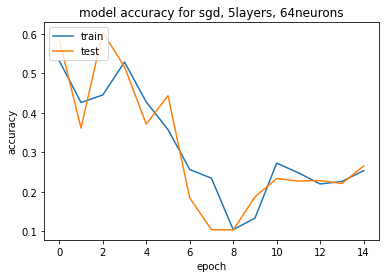

313/313 [==============================] - 1s 3ms/step - loss: 0.8482 - accuracy: 0.6780


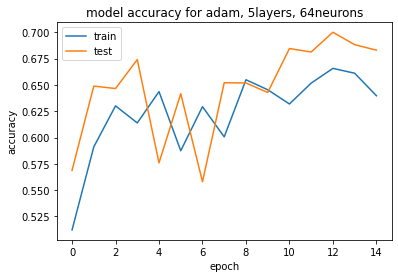

313/313 [==============================] - 1s 3ms/step - loss: 0.7234 - accuracy: 0.7204


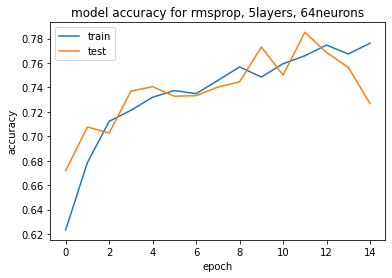

In [ ]:
optimization_in_models('sgd')
optimization_in_models('adam')
optimization_in_models('rmsprop')

Выводы:
Большее количество нейронов дает прирост к точности.
Глубокие сети работают лучше, но слишком глубокие дают плохие результаты.
RMSProp показал самые хорошие результаты.

 Сформируем матрицу ошибок по классам.

In [ ]:
model = Sequential([Dense( 64, activation='relu', input_shape=(784,))])

for i in range(5):
  model.add(tf.keras.layers.Dense(64, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(
  optimizer='rmsprop', # оптимизатор
  loss=keras.losses.CategoricalCrossentropy(), # функция потерь
  metrics=['accuracy'], # метрика
) 


# Train the model.
hh = model.fit(    
  train_images[:,:],

  y_t[:,:],
  epochs=15,
  batch_size=32, validation_split=0.2, verbose = 0
)

  # Evaluate the model.
model.evaluate( 
  test_images,
  y_tt
)


predictions = model.predict(test_images)


313/313 [==============================] - 1s 3ms/step - loss: 0.6709 - accuracy: 0.7519


In [ ]:
!pip install scikit-plot
from scikitplot.metrics import plot_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


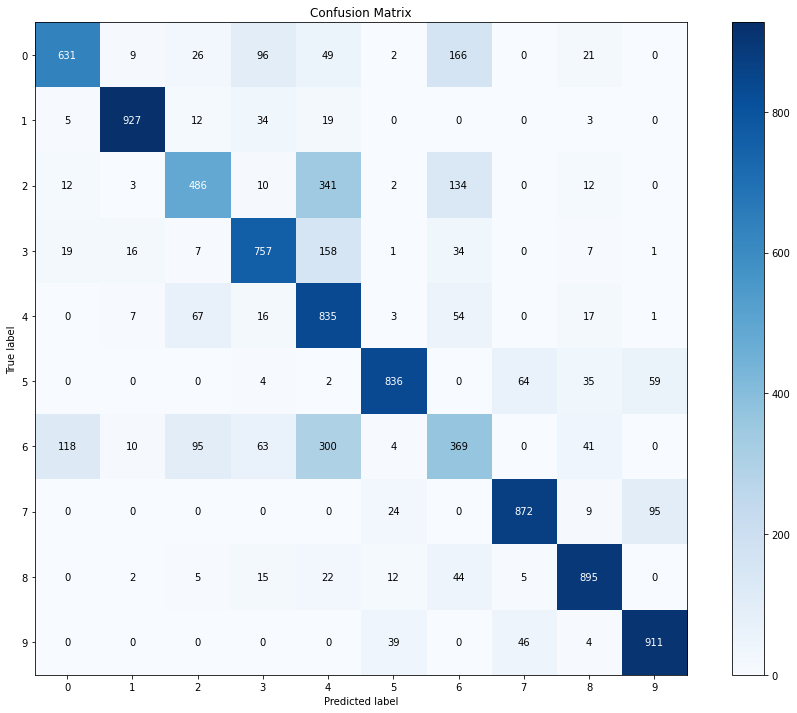

In [ ]:
y_pred_class = np.argmax(predictions, axis=1)
fig, ax = plt.subplots(figsize=(16,12))
plot_confusion_matrix(test_labelf, y_pred_class, ax=ax)